In [6]:
#The objective is to predict if passanger has survived or not

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import re
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
%matplotlib inline


In [7]:
train=pd.read_csv("data/nonlinearclassification/titanic_train.csv")
test=pd.read_csv("data/nonlinearclassification/titanic_test.csv")

print("Train dataset has {} samples and {} attributes".format(*train.shape))
print("Test dataset has {} samples and {} attributes".format(*test.shape))

Train dataset has 891 samples and 12 attributes
Test dataset has 418 samples and 11 attributes


In [8]:
train.head()
#We have 11 feature columns and target variable Survived which is binary.
#Pclass, Sex and Embarked are Categorical Features 
#Age, SibSp, Parch and Fare are continuous variables.

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S


/opt/ds/lib/python3.4/site-packages/matplotlib/__init__.py:892: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


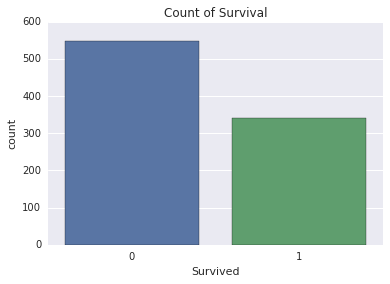

In [9]:
#We will use Name, Ticket and Cabin variable in Feature Engineering

fig , ax = plt.subplots(figsize=(6,4))
sns.countplot(x='Survived', data=train)
plt.title("Count of Survival")

In [10]:
n=len(train)
surv_0=len(train[train['Survived']==0])
surv_1=len(train[train['Survived']==1])

print("% of passanger survived in train dataset: ",surv_1*100/n)
print("% of passanger not survived in train dataset: ",surv_0*100/n)

% of passanger survived in train dataset:  38.38383838383838
% of passanger not survived in train dataset:  61.61616161616162


In [11]:
#Let's find correlation between Numeric Variable¶

cat=['Pclass','Sex','Embarked']
num=['Age','SibSp','Parch','Fare']

corr_df=train[num]  #New dataframe to calculate correlation between numeric features
cor= corr_df.corr(method='pearson')
print(cor)

            Age     SibSp     Parch      Fare
Age    1.000000 -0.308247 -0.189119  0.096067
SibSp -0.308247  1.000000  0.414838  0.159651
Parch -0.189119  0.414838  1.000000  0.216225
Fare   0.096067  0.159651  0.216225  1.000000


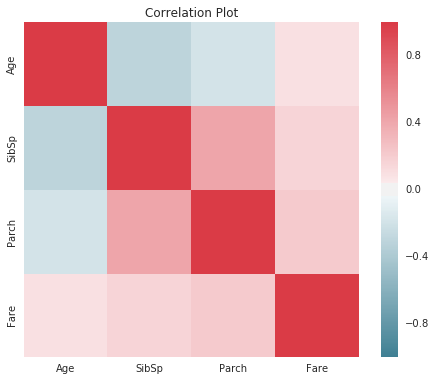

In [12]:
fig, ax =plt.subplots(figsize=(8, 6))
plt.title("Correlation Plot")
sns.heatmap(cor, mask=np.zeros_like(cor, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

#There's no strong correlation between any two variables. The strongest correlation is between SibSp and Parch features
#I would like to keep all the features as there is no strong evidence of data redundancy.

In [13]:
#Let's use chi-square test to understand relationship between categorical variables and target variable

csq=chi2_contingency(pd.crosstab(train['Survived'], train['Sex']))
print("P-value: ",csq[1])

P-value:  1.19735706278e-58


In [14]:
csq2=chi2_contingency(pd.crosstab(train['Survived'], train['Embarked']))
print("P-value: ",csq2[1])

P-value:  1.76992228412e-06


In [15]:
csq3=chi2_contingency(pd.crosstab(train['Survived'], train['Pclass']))
print("P-value: ",csq3[1])

P-value:  4.5492517113e-23


/opt/ds/lib/python3.4/site-packages/matplotlib/__init__.py:892: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


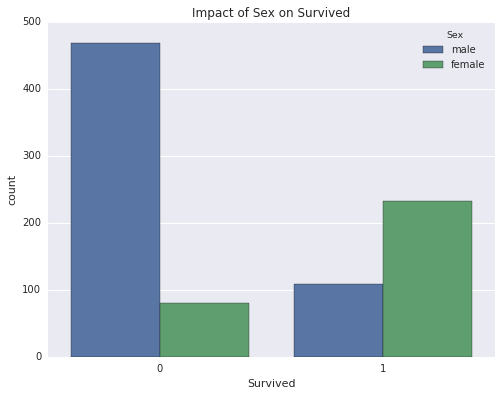

In [16]:
#First Let's check the impact of feeature Sex on Survived

fig, ax=plt.subplots(figsize=(8,6))
sns.countplot(x='Survived', data=train, hue='Sex')
ax.set_ylim(0,500)
plt.title("Impact of Sex on Survived")

#We can say that Female passangers have higher probability of survival than Male passangers

/opt/ds/lib/python3.4/site-packages/matplotlib/__init__.py:892: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


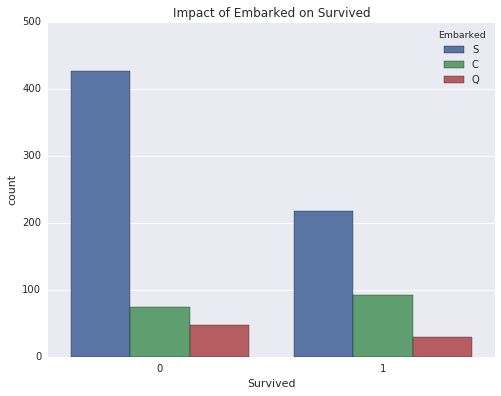

In [17]:
fig, ax=plt.subplots(figsize=(8,6))
sns.countplot(x='Survived', data=train, hue='Embarked')
ax.set_ylim(0,500)
plt.title("Impact of Embarked on Survived")

#Ratio of Survived and Not Survived passangers for S and Q Embarked are similar but Passengers from C embarked have
#higer chances of survival.

/opt/ds/lib/python3.4/site-packages/matplotlib/__init__.py:892: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


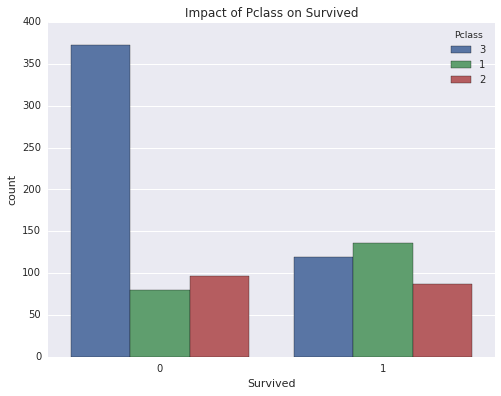

In [18]:
fig, ax=plt.subplots(figsize=(8,6))
sns.countplot(x='Survived', data=train, hue='Pclass')
ax.set_ylim(0,400)
plt.title("Impact of Pclass on Survived")

#Passengers from Pclass 3 have lesser chances of Survival while passengers from Pclass 1 have higher chances of survival

/opt/ds/lib/python3.4/site-packages/matplotlib/__init__.py:892: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


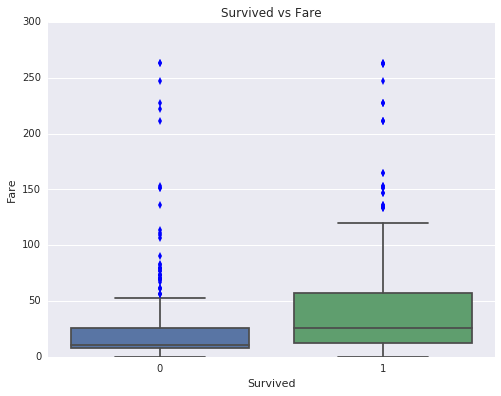

In [19]:
fig, ax=plt.subplots(1,figsize=(8,6))
sns.boxplot(x='Survived',y='Fare', data=train)
ax.set_ylim(0,300)
plt.title("Survived vs Fare")

#Average Fare for passangers who survived is higher than not survived.

In [20]:
#Handling Missing Values¶
print(train.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [21]:
print(test.isnull().sum())

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


In [22]:
#Only 4 features have missing values

train['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [23]:
#Let's replace missing values by median of Age.

med=np.nanmedian(train['Age'])
train['Age']=train['Age'].fillna(med)
test['Age']=test['Age'].fillna(med)


In [24]:
train['Cabin'].value_counts()

G6                 4
C23 C25 C27        4
B96 B98            4
F33                3
C22 C26            3
E101               3
F2                 3
D                  3
E44                2
B22                2
D26                2
F4                 2
B57 B59 B63 B66    2
B58 B60            2
D36                2
D35                2
E8                 2
B77                2
D17                2
C124               2
C65                2
B35                2
B5                 2
E121               2
B18                2
D20                2
C52                2
D33                2
C125               2
B51 B53 B55        2
                  ..
A19                1
C128               1
C7                 1
B69                1
B19                1
A7                 1
A20                1
T                  1
E46                1
C101               1
E58                1
E12                1
D49                1
B101               1
C118               1
C85                1
A5           

In [25]:
#Let's replace NaN by 0
train['Cabin']=train['Cabin'].fillna(0)
test['Cabin']=test['Cabin'].fillna(0)

In [26]:
train['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [27]:
#Let's replace the NaN by mode
train['Cabin']=train['Cabin'].fillna("S")

In [28]:
train['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [29]:
med=np.nanmedian(train['Fare'])
test['Fare']=test['Fare'].fillna(med)

In [31]:
#from cabin let's create a new feature hasCabin

train['hasCabin']=train['Cabin'].apply(lambda x: 0 if x==0 else 1)
test['hasCabin']=test['Cabin'].apply(lambda x: 0 if x==0 else 1)

In [32]:
#Let's combine SibSp and Parch features to create new one FamilyMem
train['FamilyMem']=train.apply(lambda x: x['SibSp']+x['Parch'], axis=1)
test['FamilyMem']=test.apply(lambda x: x['SibSp']+x['Parch'], axis=1)

In [33]:
#Let's use prefixes in the name to Create a new column Title
def get_title(name):
    title_search = re.search(' ([A-Za-z]+)\.', name)
    if title_search:
        return title_search.group(1)
    return ""

train['title']=train['Name'].apply(get_title)
test['title']=test['Name'].apply(get_title)

In [34]:
title_lev1=list(train['title'].value_counts().reset_index()['index'])
title_lev2=list(test['title'].value_counts().reset_index()['index'])

In [35]:
title_lev=list(set().union(title_lev1, title_lev2))
print(title_lev)

['Miss', 'Jonkheer', 'Mrs', 'Sir', 'Lady', 'Dona', 'Ms', 'Mlle', 'Col', 'Capt', 'Don', 'Mr', 'Rev', 'Master', 'Major', 'Mme', 'Countess', 'Dr']


In [48]:
#Assigning datatypes
train['title']=pd.Categorical(train['title'], categories=title_lev)
test['title']=pd.Categorical(test['title'], categories=title_lev)

cols=['Pclass','Sex','Embarked','hasCabin','title']
for c in cols:
    train[c]=train[c].astype('category')
    test[c]=test[c].astype('category')

In [50]:
#Let's create dummy variables¶
fcol=['Pclass','Sex','Embarked','hasCabin','title','Age','FamilyMem','Fare']
train_df=train[fcol]
test_df=test[fcol]
train_df=pd.get_dummies(train_df, columns=cols)
test_df=pd.get_dummies(test_df, columns=cols)
y=train['Survived']

In [51]:
#Model
x_train, x_test, y_train, y_test = train_test_split(train_df, y, test_size=0.3, random_state=42)

In [52]:
#random Forest
rfc=RandomForestClassifier(random_state=42)


In [53]:
param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

In [54]:
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
CV_rfc.fit(x_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=42, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_estimators': [200, 500], 'max_features': ['auto', 'sqrt', 'log2'], 'criterion': ['gini', 'entropy'], 'max_depth': [4, 5, 6, 7, 8]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [55]:
CV_rfc.best_params_

{'criterion': 'entropy',
 'max_depth': 8,
 'max_features': 'log2',
 'n_estimators': 200}

In [56]:
rfc1=RandomForestClassifier(random_state=42, max_features='auto', n_estimators= 200, max_depth=8, criterion='gini')

In [57]:
rfc1.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=8, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=1,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [58]:
pred=rfc1.predict(x_test)

In [59]:
print("Accuracy for Random Forest on CV data: ",accuracy_score(y_test,pred))

Accuracy for Random Forest on CV data:  0.80223880597


In [60]:
op_rf=rfc1.predict(test_df)

In [61]:
op=pd.DataFrame(test['PassengerId'])
op['Survived']=op_rf

In [62]:
op.to_csv("op_rf.csv", index=False)